In [1]:
import numpy as np   # Some basic libraries
import pandas as pd
import matplotlib.pyplot as plt  #A visvualization library
from sklearn.neural_network import MLPRegressor  #Importing MLP from sklearn
from math import sqrt                      #Some libraries for error calculation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split  #Split the data set
from sklearn import preprocessing  #preprocessing library

In [10]:
#columns name 
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#Data load from csv file
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
print('Name of columns', df.columns,'\nShape of data', np.shape(df))

Name of columns Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object') 
Shape of data (506, 14)


In [12]:
#A brief statistical details
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
#Select all columns (except MEDV) as input features set
X = df.drop(['MEDV'], axis=1)
print('Shape of input feature:',X.shape)
#Preprocessing is done
X = preprocessing.scale(X)
pd.DataFrame(X).describe()

Shape of input feature: (506, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00


In [14]:
#Select the target variable
Y=df['MEDV']
print('Shape of target:', Y.shape)

Shape of target: (506,)


In [15]:
#The actual data is splited into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [16]:
#The MLP algorithm with some hyperparameters
model = MLPRegressor(hidden_layer_sizes=[20,20],activation='relu',alpha=1.0,
                   learning_rate ='constant', max_iter=10000,random_state=42)
#Model is trained on training dataset
model.fit(X_train,y_train)

MLPRegressor(alpha=1.0, hidden_layer_sizes=[20, 20], max_iter=10000,
             random_state=42)

In [17]:
#Predictions are done on input test and train
y_predtest = model.predict(X_test)
y_predtrain = model.predict(X_train)

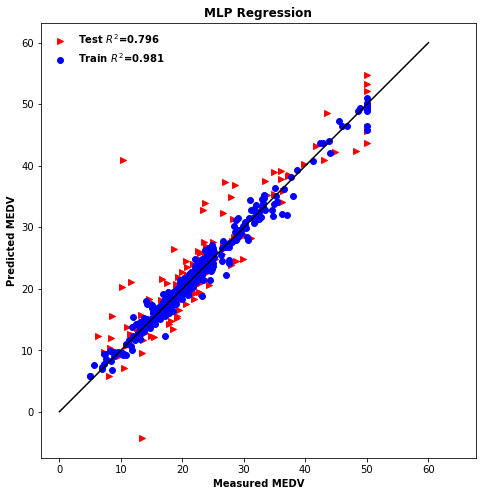

In [18]:
#A scatter plot with a metric r_square
plt.figure(figsize = (8,8))
plt.plot([0,60],[0,60],color='black')
plt.scatter(y_test,y_predtest , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_predtest),alpha=1)
plt.scatter(y_train, y_predtrain,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_predtrain),alpha=1 )

plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('MLP Regression',fontweight='bold')
plt.axis('square')

#plt.savefig('MLP_1.pdf', dpi=5000)  # Save the plot in pdf
plt.show()

In [19]:
#Some important metrics for our trained model for train and test set
print('parameter for train')
print('mean_squared_error:', mean_squared_error(y_train,y_predtrain))
print('mean_absolute_error:',mean_absolute_error(y_train,y_predtrain))
print('root mean squared error:', sqrt(mean_squared_error(y_train,y_predtrain)))
print('MPAE:',np.mean(np.abs((y_train - y_predtrain) / y_train)) * 100)
print('\nR2 value_train:',r2_score(y_train,y_predtrain))

print('\nparameter for testing')
print('mean_squared_error:', mean_squared_error(y_test,y_predtest))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predtest))
print('root mean squared error:', sqrt(mean_squared_error(y_test,y_predtest)))
print('MPAE:',np.mean(np.abs((y_test - y_predtest) / y_test)) * 100)
print('\nR2 value_test:',r2_score(y_test,y_predtest))

parameter for train
mean_squared_error: 1.5553302641774474
mean_absolute_error: 0.8859098938658655
root mean squared error: 1.2471288081739782
MPAE: 4.554623914166755

R2 value_train: 0.9808431061776824

parameter for testing
mean_squared_error: 18.71975121467891
mean_absolute_error: 2.6913276793627037
root mean squared error: 4.326632780197427
MPAE: 15.23699693095837

R2 value_test: 0.7957573949010603


**Nerual network by using keras framework**

In [20]:
#Import some crucial tools from tensorflow library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras import Sequential

In [21]:
#The weight initiatization is fixed
import random
random.seed(11)

In [22]:
#A custom metric r_square is defined
def r_square(y_test, y_predtest):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_test - y_predtest)) 
    SS_tot = K.sum(K.square(y_test - K.mean(y_test))) 
    return (1 - (SS_res)/(SS_tot))

In [25]:
#Architcture of NN with dropout layer
def create_model():
    model = Sequential()
    model.add(Dense(400, input_dim=13, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(1))
    # Compile model
    sgd = keras.optimizers.SGD(learning_rate=0.001)
    model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer=sgd, metrics = [r_square])
    return model
#Model is called here
model=create_model()

In [28]:
y_train.mean()

22.339830508474574

In [24]:
model = model.fit(X_train, # Features
                      y_train, # Target vector
                      epochs = 100,
                      verbose = 1,
                      validation_split = 0.2) # Data for evaluation

Epoch 1/100


2022-08-10 17:34:34.167954: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-10 17:34:34.439347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 514.4164 - r_square: -6.4901 

2022-08-10 17:34:37.313372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 3s 96ms/step - loss: 514.4164 - r_square: -6.4901 - val_loss: 202.4818 - val_r_square: -1.5886
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 108.5316 - r_square: -0.4118 - val_loss: 43.1170 - val_r_square: 0.5086
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 36.9276 - r_square: 0.5457 - val_loss: 27.6128 - val_r_square: 0.6919
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 26.9818 - r_square: 0.6623 - val_loss: 25.6317 - val_r_square: 0.7125
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 22.0382 - r_square: 0.7268 - val_loss: 24.4013 - val_r_square: 0.7150
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 23.6624 - r_square: 0.6204 - val_loss: 79.1846 - val_r_square: -0.0590
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 24.5889 - r_square: 0.6623 - val_loss: 28.4969 - val_r_square: 0.6520
Epoch 8/100

9/9 [==============================] - 0s 10ms/step - loss: 7.0024 - r_square: 0.8858 - val_loss: 13.9659 - val_r_square: 0.8349
Epoch 59/100
9/9 [==============================] - 0s 10ms/step - loss: 7.9131 - r_square: 0.8974 - val_loss: 13.8353 - val_r_square: 0.8418
Epoch 60/100
9/9 [==============================] - 0s 9ms/step - loss: 7.7854 - r_square: 0.8997 - val_loss: 14.2862 - val_r_square: 0.8340
Epoch 61/100
9/9 [==============================] - 0s 9ms/step - loss: 8.2429 - r_square: 0.8812 - val_loss: 12.1387 - val_r_square: 0.8420
Epoch 62/100
9/9 [==============================] - 0s 9ms/step - loss: 9.3162 - r_square: 0.8782 - val_loss: 12.3314 - val_r_square: 0.8476
Epoch 63/100
9/9 [==============================] - 0s 9ms/step - loss: 7.5905 - r_square: 0.8828 - val_loss: 15.3141 - val_r_square: 0.8197
Epoch 64/100
9/9 [==============================] - 0s 9ms/step - loss: 6.3813 - r_square: 0.9170 - val_loss: 15.7857 - val_r_square: 0.8163
Epoch 65/100
9/9 [======

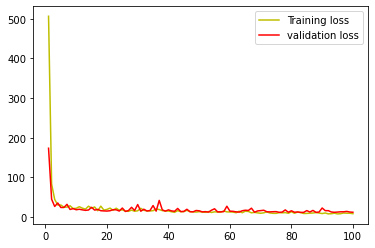

In [18]:
#Loss v/s epochs plot
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.legend( loc ='best')
plt.show()

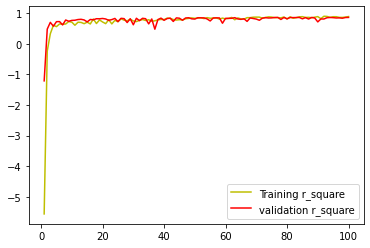

In [19]:
#R_square v/s epochs plot
r_square = model.history['r_square']
val_r_square = model.history['val_r_square']
epochs = range(1,len(loss)+1)
plt.plot(epochs, r_square, 'y', label='Training r_square')
plt.plot(epochs, val_r_square, 'r', label='validation r_square')
plt.legend(loc ='best')
plt.show()

In [20]:
#Predictions on input test and train
y_predtest = model.model.predict(X_test)
y_predtrain = model.model.predict(X_train)

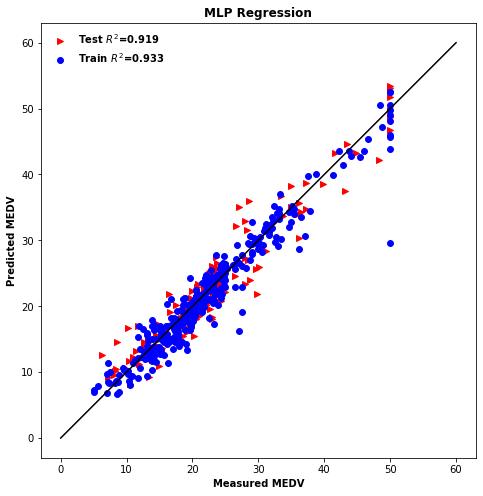

In [21]:
#A scatter plot with a metric r_square
plt.figure(figsize = (8,8))
plt.plot([0,60],[0,60],color='black')
plt.scatter(y_test,y_predtest , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_predtest),alpha=1)
plt.scatter(y_train, y_predtrain,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_predtrain),alpha=1 )

plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('MLP Regression',fontweight='bold')
plt.axis('square')

#plt.savefig('NN.pdf', dpi=5000)   # Save the plot in pdf
plt.show()

In [22]:
#Conversion of array to list
def ndarray_series(y_predtest):
    list1 = []
    for i in y_predtest:
        list1.append(i[0])
    return list1

In [24]:
y_predtrain =  ndarray_series(y_predtrain)
y_predtest =  ndarray_series(y_predtest)

In [25]:
#Some important metrics for our trained model for train and test set
print('parameter for train')
print('mean_squared_error:', mean_squared_error(y_train,y_predtrain))
print('mean_absolute_error:',mean_absolute_error(y_train,y_predtrain))
print('root mean squared error:', sqrt(mean_squared_error(y_train,y_predtrain)))
print('MPAE:',np.mean(np.abs((y_train - y_predtrain) / y_train)) * 100)
print('\nR2 value_train:',r2_score(y_train,y_predtrain))

print('\nparameter for testing')
print('mean_squared_error:', mean_squared_error(y_test,y_predtest))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predtest))
print('root mean squared error:', sqrt(mean_squared_error(y_test,y_predtest)))
print('MPAE:',np.mean(np.abs((y_test - y_predtest) / y_test)) * 100)
print('\nR2 value_test:',r2_score(y_test,y_predtest))

parameter for train
mean_squared_error: 5.403056110159653
mean_absolute_error: 1.575414071379408
root mean squared error: 2.32444748492188
MPAE: 8.06336513661883

R2 value_train: 0.9334509366902258

parameter for testing
mean_squared_error: 7.415147204749255
mean_absolute_error: 2.110682897818716
root mean squared error: 2.7230767900941126
MPAE: 10.90828716088

R2 value_test: 0.919096735585752
